In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

In [3]:
path = "resized_train_cropped/resized_train_cropped"

In [4]:
data = "resized_train/resized_train"
print('number of images in total - ',len(os.listdir(data)))


number of images in total -  35126


In [5]:
index = pd.read_csv("trainLabels.csv") 
print('number of images in total - ',len(index))

number of images in total -  35126


In [6]:
index.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [7]:

index['image_name'] = [i+".jpeg" for i in index['image'].values]
index['level_binary'] = [i for i in index['level'].values]    
index.head(10)

,image,level,image_name,level_binary
0,10_left,0,10_left.jpeg,0
1,10_right,0,10_right.jpeg,0
2,13_left,0,13_left.jpeg,0
3,13_right,0,13_right.jpeg,0
4,15_left,1,15_left.jpeg,1
5,15_right,2,15_right.jpeg,2
6,16_left,4,16_left.jpeg,4
7,16_right,4,16_right.jpeg,4
8,17_left,0,17_left.jpeg,0
9,17_right,1,17_right.jpeg,1


In [8]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         35126 non-null  object
 1   level         35126 non-null  int64 
 2   image_name    35126 non-null  object
 3   level_binary  35126 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


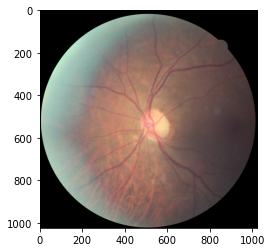

In [9]:
temp = path + '/10_left' + '.jpeg'

plt.imshow(plt.imread(temp))

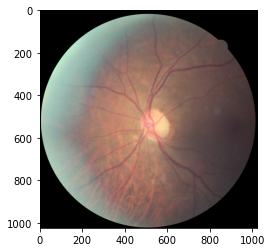

In [10]:
temp = path + '/10_left' + '.jpeg'

plt.imshow(plt.imread(temp))

In [11]:
plt.imread(temp).shape

(1024, 1024, 3)

In [12]:
train, val = train_test_split(index, test_size=0.2,random_state=42,stratify=index["level"])

In [13]:
train.shape, val.shape

((28100, 4), (7026, 4))

In [14]:
train_datagen = ImageDataGenerator(rescale            = 1/255,
                                   shear_range        = 0.2,
                                   zoom_range         = 0.2,
                                   horizontal_flip    = True,
                                   rotation_range     = 40,
                                   width_shift_range  = 0.2,
                                   height_shift_range = 0.2)

val_datagen = ImageDataGenerator(rescale = 1/255)

In [15]:
train_set = train_datagen.flow_from_dataframe(
    train,
    "resized_train_cropped/resized_train_cropped",
    x_col="image_name",
    y_col="level",
    class_mode="raw",
    color_mode="rgb",
    batch_size=32,
    target_size=(64, 64))

val_set = val_datagen.flow_from_dataframe(
    val,
    "resized_train_cropped/resized_train_cropped",
    x_col="image_name",
    y_col="level",
    class_mode="raw",
   color_mode="rgb",
    batch_size=32,
    target_size=(64, 64))

Found 28086 validated image filenames.
Found 7022 validated image filenames.


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 14 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 4 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [16]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

2022-05-03 16:29:06.321622: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [19]:
model_train = model.fit(
    train_set,
    steps_per_epoch = 200,
    epochs = 3,
    validation_data = val_set,
    verbose=1
)

Epoch 1/3
  1/200 [..............................] - ETA: 6:05 - loss: 1.5873 - accuracy: 0.3438


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   OMP_NUM_THREADS=8

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIE

200/200 [==============================] - 451s 2s/step - loss: 0.9226 - accuracy: 0.7358 - val_loss: 0.8689 - val_accuracy: 0.7347
Epoch 2/3
200/200 [==============================] - 313s 2s/step - loss: 0.8881 - accuracy: 0.7369 - val_loss: 0.8714 - val_accuracy: 0.7347
Epoch 3/3
200/200 [==============================] - 293s 1s/step - loss: 0.8964 - accuracy: 0.7341 - val_loss: 0.8706 - val_accuracy: 0.7347


In [30]:
model.save("my_h5_model.h5")

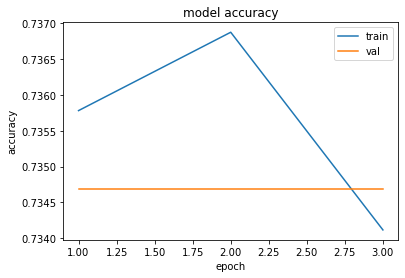

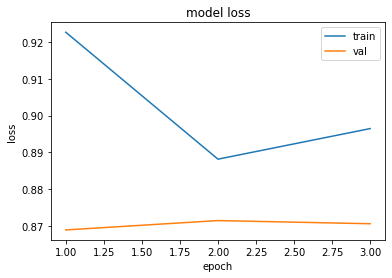

In [31]:
epochs=range(1,len(model_train.history['val_loss'])+1)

plt.title('model accuracy')
plt.plot(epochs,model_train.history['accuracy'])
plt.plot(epochs,model_train.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.plot(epochs,model_train.history['loss'])
plt.plot(epochs,model_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()